<a href="https://colab.research.google.com/github/JF11579/New-Stuff/blob/main/Covid_effects_LI_Economy_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are two datasets.  Reported cases of covid in Nassau and Suffolk and the other is the monthly retail sales tax collected by Nassau and Suffolk

First we will look a tthe covid data[link text](https://)

Librarys

In [ ]:
library(tidyverse)
library(ggplot2)

In [ ]:
options(scipen = 999)

# Covid Data

The data (May be too large to open in spreadsheet)

https://drive.google.com/file/d/1qn1ndxXWHOn6SXEXbr7NwzHYm6rm_JZ3/view?usp=sharing

In [ ]:
Covid_data_US <- read.csv("/content/Covid_data_NYT_Jan_26,_2021.csv")
head(Covid_data_US)

,date,county,state,fips,cases,deaths
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,2020-01-21,Snohomish,Washington,53061,1,0
2,2020-01-22,Snohomish,Washington,53061,1,0
3,2020-01-23,Snohomish,Washington,53061,1,0
4,2020-01-24,Cook,Illinois,17031,1,0
5,2020-01-24,Snohomish,Washington,53061,1,0
6,2020-01-25,Orange,California,6059,1,0


change date column from character to Date type

In [ ]:
Covid_data_US$date <-  as.Date(Covid_data_US$date)
head(Covid_data_US )

,date,county,state,fips,cases,deaths
,<date>,<chr>,<chr>,<int>,<int>,<int>
1,2020-01-21,Snohomish,Washington,53061,1,0
2,2020-01-22,Snohomish,Washington,53061,1,0
3,2020-01-23,Snohomish,Washington,53061,1,0
4,2020-01-24,Cook,Illinois,17031,1,0
5,2020-01-24,Snohomish,Washington,53061,1,0
6,2020-01-25,Orange,California,6059,1,0


## Nassau

First we will filter out Nassau county .

Then add the population column, then the dereived cases per 100k column.

Then we will do the same for Suffolk county

Lastly we will merge the two counties.

In [ ]:
str(Covid_data_US )

'data.frame':	962707 obs. of  6 variables:
 $ date  : Date, format: "2020-01-21" "2020-01-22" ...
 $ county: chr  "Snohomish" "Snohomish" "Snohomish" "Cook" ...
 $ state : chr  "Washington" "Washington" "Washington" "Illinois" ...
 $ fips  : int  53061 53061 53061 17031 53061 6059 17031 53061 4013 6037 ...
 $ cases : int  1 1 1 1 1 1 1 1 1 1 ...
 $ deaths: int  0 0 0 0 0 0 0 0 0 0 ...


In [ ]:
Nassau_covid<- filter(Covid_data_US , state == "New York" ,  county == "Nassau")


Add a column of Nassau population. We will need that to get the cases per 100,ooo.  We use the US census number.

In [ ]:
# Now let us add a column for Nassau's population to get ** per 100**
# This is the July 2019 US estimate : 1,356,924
#df1$x1 <- 'z'
Nassau_covid$Nassau_population <- 1356924
head(Nassau_covid)

,date,county,state,fips,cases,deaths,Nassau_population
,<date>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
1,2020-03-05,Nassau,New York,36059,1,0,1356924
2,2020-03-06,Nassau,New York,36059,4,0,1356924
3,2020-03-07,Nassau,New York,36059,4,0,1356924
4,2020-03-08,Nassau,New York,36059,5,0,1356924
5,2020-03-09,Nassau,New York,36059,17,0,1356924
6,2020-03-10,Nassau,New York,36059,19,0,1356924


We will be performing the same tasks on Suffolk data so we need a way to distinguish the two situations.  We will give them more specific names.

In [ ]:
#rename(data, c("new" = "old#"))
Nassau_covid <- Nassau_covid %>% 
 rename(
     "Nassau_cases" = "cases",
     "Nassau_deaths" = "deaths")
head(Nassau_covid)

,date,county,state,fips,Nassau_cases,Nassau_deaths,Nassau_population
,<date>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
1,2020-03-05,Nassau,New York,36059,1,0,1356924
2,2020-03-06,Nassau,New York,36059,4,0,1356924
3,2020-03-07,Nassau,New York,36059,4,0,1356924
4,2020-03-08,Nassau,New York,36059,5,0,1356924
5,2020-03-09,Nassau,New York,36059,17,0,1356924
6,2020-03-10,Nassau,New York,36059,19,0,1356924


To compare counties with different populations we will generate a number of the number of cases per 100,ooo

In [ ]:
Nassau_covid <- Nassau_covid %>%
        mutate(Nassau_case_percentage = Nassau_cases / Nassau_population) %>%
        mutate(Nassau_per_100k = Nassau_case_percentage * 100000)
head(Nassau_covid)

,date,county,state,fips,Nassau_cases,Nassau_deaths,Nassau_population,Nassau_case_percentage,Nassau_per_100k
,<date>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,2020-03-05,Nassau,New York,36059,1,0,1356924,0.0000007369609,0.07369609
2,2020-03-06,Nassau,New York,36059,4,0,1356924,0.0000029478438,0.29478438
3,2020-03-07,Nassau,New York,36059,4,0,1356924,0.0000029478438,0.29478438
4,2020-03-08,Nassau,New York,36059,5,0,1356924,0.0000036848047,0.36848047
5,2020-03-09,Nassau,New York,36059,17,0,1356924,0.0000125283361,1.25283361
6,2020-03-10,Nassau,New York,36059,19,0,1356924,0.0000140022580,1.40022580


In [ ]:
write.csv(Nassau_covid, "Nassau_covid.csv")

Lets check the structure of the data

In [ ]:
str(Nassau_covid)

'data.frame':	326 obs. of  9 variables:
 $ date                  : Date, format: "2020-03-05" "2020-03-06" ...
 $ county                : chr  "Nassau" "Nassau" "Nassau" "Nassau" ...
 $ state                 : chr  "New York" "New York" "New York" "New York" ...
 $ fips                  : int  36059 36059 36059 36059 36059 36059 36059 36059 36059 36059 ...
 $ Nassau_cases          : int  1 4 4 5 17 19 28 41 51 79 ...
 $ Nassau_deaths         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Nassau_population     : num  1356924 1356924 1356924 1356924 1356924 ...
 $ Nassau_case_percentage: num  0.000000737 0.000002948 0.000002948 0.000003685 0.000012528 ...
 $ Nassau_per_100k       : num  0.0737 0.2948 0.2948 0.3685 1.2528 ...


Next we create a new daset of  monthly avg of newly reporte covid cases. 

In [ ]:
Nassau_monthly_avg_cases <- aggregate(Nassau_covid$Nassau_cases, list(format(Nassau_covid$date, "%Y-%m"), Nassau_covid$county),mean )
Nassau_monthly_avg_cases

Group.1,Group.2,x
<chr>,<chr>,<dbl>
2020-03,Nassau,1854.704
2020-04,Nassau,25270.967
2020-05,Nassau,38749.710
2020-06,Nassau,41233.333
2020-07,Nassau,42507.677
2020-08,Nassau,43951.290
2020-09,Nassau,45849.700
2020-10,Nassau,48421.258
2020-11,Nassau,54572.000


Improve those column names.

In [ ]:
Nassau_monthly_avg_cases <- Nassau_monthly_avg_cases %>% 
 rename(
     "date" = "Group.1",
     "county" = "Group.2",
     "Nassau_monthly_case_avg" = "x")

In [ ]:
Nassau_monthly_avg_cases

Date is currently character type .  Change to date type.  But it is missing he day column.  We need to add that too

In [ ]:
Nassau_monthly_avg_cases$date <-lubridate::ymd(paste0(year_month = Nassau_monthly_avg_cases$date, date = "01"))
Nassau_monthly_avg_cases

date,county,Nassau_monthly_case_avg
<date>,<chr>,<dbl>
2020-03-01,Nassau,1854.704
2020-04-01,Nassau,25270.967
2020-05-01,Nassau,38749.710
2020-06-01,Nassau,41233.333
2020-07-01,Nassau,42507.677
2020-08-01,Nassau,43951.290
2020-09-01,Nassau,45849.700
2020-10-01,Nassau,48421.258
2020-11-01,Nassau,54572.000


In [ ]:
write.csv(Nassau_monthly_avg_cases,"Nassau_monthly_avg_cases.csv")

In [ ]:
'''
Suffolk_covid <- Suffolk_covid %>%
              mutate(Suffolk_case_percentage = Suffolk_cases / Suffolk_population) %>%
              mutate(Suffolk_per_100k = Suffolk_case_percentage * 100000)
head(Suffolk_covid  ) 

'''

## Suffolk

In [ ]:
Suffolk_covid<- filter(Covid_data_US , state == "New York" , county == "Suffolk")
head(Suffolk_covid)

,date,county,state,fips,cases,deaths
,<date>,<chr>,<chr>,<int>,<int>,<int>
1,2020-03-08,Suffolk,New York,36103,1,0
2,2020-03-09,Suffolk,New York,36103,1,0
3,2020-03-10,Suffolk,New York,36103,1,0
4,2020-03-11,Suffolk,New York,36103,6,0
5,2020-03-12,Suffolk,New York,36103,21,0
6,2020-03-13,Suffolk,New York,36103,29,0


In [ ]:
Suffolk_covid$Suffolk_population <- 1476601
head(Suffolk_covid)

,date,county,state,fips,cases,deaths,Suffolk_population
,<date>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
1,2020-03-08,Suffolk,New York,36103,1,0,1476601
2,2020-03-09,Suffolk,New York,36103,1,0,1476601
3,2020-03-10,Suffolk,New York,36103,1,0,1476601
4,2020-03-11,Suffolk,New York,36103,6,0,1476601
5,2020-03-12,Suffolk,New York,36103,21,0,1476601
6,2020-03-13,Suffolk,New York,36103,29,0,1476601


Make the column heading specific to Suffolk

In [ ]:
Suffolk_covid <- Suffolk_covid %>%
        rename(
              "Suffolk_cases" = "cases",
              "Suffolk_deaths" = "deaths"
        )
head(Suffolk_covid)

,date,county,state,fips,Suffolk_cases,Suffolk_deaths,Suffolk_population
,<date>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
1,2020-03-08,Suffolk,New York,36103,1,0,1476601
2,2020-03-09,Suffolk,New York,36103,1,0,1476601
3,2020-03-10,Suffolk,New York,36103,1,0,1476601
4,2020-03-11,Suffolk,New York,36103,6,0,1476601
5,2020-03-12,Suffolk,New York,36103,21,0,1476601
6,2020-03-13,Suffolk,New York,36103,29,0,1476601


In [ ]:
Suffolk_covid <- Suffolk_covid %>%
              mutate(Suffolk_case_percentage = Suffolk_cases / Suffolk_population) %>%
              mutate(Suffolk_per_100k = Suffolk_case_percentage * 100000)
head(Suffolk_covid  ) 

,date,county,state,fips,Suffolk_cases,Suffolk_deaths,Suffolk_population,Suffolk_case_percentage,Suffolk_per_100k
,<date>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,2020-03-08,Suffolk,New York,36103,1,0,1476601,0.000000677231,0.0677231
2,2020-03-09,Suffolk,New York,36103,1,0,1476601,0.000000677231,0.0677231
3,2020-03-10,Suffolk,New York,36103,1,0,1476601,0.000000677231,0.0677231
4,2020-03-11,Suffolk,New York,36103,6,0,1476601,0.000004063386,0.4063386
5,2020-03-12,Suffolk,New York,36103,21,0,1476601,0.000014221851,1.4221851
6,2020-03-13,Suffolk,New York,36103,29,0,1476601,0.000019639700,1.9639700


In [ ]:
write.csv(Suffolk_covid ,"Suffolk_covid.csv")

In [ ]:
str(Suffolk_covid)

'data.frame':	323 obs. of  9 variables:
 $ date                   : Date, format: "2020-03-08" "2020-03-09" ...
 $ county                 : chr  "Suffolk" "Suffolk" "Suffolk" "Suffolk" ...
 $ state                  : chr  "New York" "New York" "New York" "New York" ...
 $ fips                   : int  36103 36103 36103 36103 36103 36103 36103 36103 36103 36103 ...
 $ Suffolk_cases          : int  1 1 1 6 21 29 41 47 63 84 ...
 $ Suffolk_deaths         : int  0 0 0 0 0 0 0 0 2 3 ...
 $ Suffolk_population     : num  1476601 1476601 1476601 1476601 1476601 ...
 $ Suffolk_case_percentage: num  0.000000677 0.000000677 0.000000677 0.000004063 0.000014222 ...
 $ Suffolk_per_100k       : num  0.0677 0.0677 0.0677 0.4063 1.4222 ...


In [ ]:
Suffolk_monthly_avg_cases <- aggregate(Suffolk_covid$Suffolk_cases, list(format(Suffolk_covid$date, "%Y-%m"), Suffolk_covid$county),mean )

head(Suffolk_monthly_avg_cases)

,Group.1,Group.2,x
,<chr>,<chr>,<dbl>
1,2020-03,Suffolk,1501.583
2,2020-04,Suffolk,22815.733
3,2020-05,Suffolk,37503.935
4,2020-06,Suffolk,40697.367
5,2020-07,Suffolk,42298.065
6,2020-08,Suffolk,44116.871


In [ ]:
Suffolk_monthly_avg_cases <- Suffolk_monthly_avg_cases %>% 
 rename(
     "date" = "Group.1",
     "county" = "Group.2",
     "Suffolk_monthly_case_avg" = "x")

In [ ]:
Suffolk_monthly_avg_cases

date,county,Suffolk_monthly_case_avg
<chr>,<chr>,<dbl>
2020-03,Suffolk,1501.583
2020-04,Suffolk,22815.733
2020-05,Suffolk,37503.935
2020-06,Suffolk,40697.367
2020-07,Suffolk,42298.065
2020-08,Suffolk,44116.871
2020-09,Suffolk,45773.633
2020-10,Suffolk,47872.774
2020-11,Suffolk,54033.567


Date is currently CHARACTER class. Cannot comver to DATE class if it only has Year and month (YYYY-mm) it needs a date.

To accomplish this , first cast it as character string then paste on a "0".

Then convert to date type

In [ ]:
Suffolk_monthly_avg_cases$date <-lubridate::ymd(paste0(year_month = Suffolk_monthly_avg_cases$date, date = "01"))
Suffolk_monthly_avg_cases

date,county,Suffolk_monthly_case_avg
<date>,<chr>,<dbl>
2020-03-01,Suffolk,1501.583
2020-04-01,Suffolk,22815.733
2020-05-01,Suffolk,37503.935
2020-06-01,Suffolk,40697.367
2020-07-01,Suffolk,42298.065
2020-08-01,Suffolk,44116.871
2020-09-01,Suffolk,45773.633
2020-10-01,Suffolk,47872.774
2020-11-01,Suffolk,54033.567


In [ ]:
head(Nassau_monthly_avg_cases ,3)

,date,county,Nassau_monthly_case_avg
,<date>,<chr>,<dbl>
1,2020-03-15,Nassau,1854.704
2,2020-04-15,Nassau,25270.967
3,2020-05-15,Nassau,38749.710


### Now Merge the two data sets

We cannot do a rbind becasue they have different col names (Nassau cases v Suffolk Cases). Instead we will perform a column bind and then make the data skinny becasue then ggplot automatically includes the legend.

And inner join will not duplicate the date column

In [ ]:
Nassau_Suffolk_Avg_Monthly_Per_100k_inner <- inner_join(Nassau_monthly_avg_cases , Suffolk_monthly_avg_cases ,by ="date")
Nassau_Suffolk_Avg_Monthly_Per_100k_inner

In [ ]:
'''
Suffolk_avg_cases_per_100k <- Suffolk_avg_cases_per_100k %>%
        rename(
              "date" = "Group.1",
              "county" = "Group.2",
              "Suffolk_monthly_avg_cases_per_100k" = "x"
        )

'''

In [ ]:
Nassau_Suffolk_Avg_Monthly_Per_100k_inner  <- Nassau_Suffolk_Avg_Monthly_Per_100k_inner  %>%
        rename("Nassau_name " = "county.x",
               " Suffolk_name" = "county.y"

        )
head(Nassau_Suffolk_Avg_Monthly_Per_100k_inner)

,date,Nassau_name,Nassau_monthly_case_avg,Suffolk_name,Suffolk_monthly_case_avg
,<date>,<chr>,<dbl>,<chr>,<dbl>
1,2020-03-01,Albany,101.6000,Suffolk,1501.583
2,2020-04-01,Albany,598.3667,Suffolk,22815.733
3,2020-05-01,Albany,1564.3548,Suffolk,37503.935
4,2020-06-01,Albany,2015.8667,Suffolk,40697.367
5,2020-07-01,Albany,2293.6452,Suffolk,42298.065
6,2020-08-01,Albany,2646.7742,Suffolk,44116.871


In [ ]:
Nassau_Suffolk_select <- Nassau_Suffolk_Avg_Monthly_Per_100k_inner %>% select(date, Nassau_monthly_case_avg ,
                        Suffolk_monthly_case_avg)
head(Nassau_Suffolk_select)

,date,Nassau_monthly_case_avg,Suffolk_monthly_case_avg
,<date>,<dbl>,<dbl>
1,2020-03-01,101.6000,1501.583
2,2020-04-01,598.3667,22815.733
3,2020-05-01,1564.3548,37503.935
4,2020-06-01,2015.8667,40697.367
5,2020-07-01,2293.6452,42298.065
6,2020-08-01,2646.7742,44116.871


Make data longer to graph

As per https://towardsdatascience.com/coding-in-r-pivot-painlessly-32e40a0b6c3d

In [ ]:
Nassau_SuffolkPer_100_long <-
          Nassau_Suffolk_select %>%
          pivot_longer(cols = c("Nassau_monthly_case_avg" , "Suffolk_monthly_case_avg") ,
          names_to = "county" ,
          values_to = "cases")

head(Nassau_SuffolkPer_100_long)

date,county,cases
<date>,<chr>,<dbl>
2020-03-01,Nassau_monthly_case_avg,101.6000
2020-03-01,Suffolk_monthly_case_avg,1501.5833
2020-04-01,Nassau_monthly_case_avg,598.3667
2020-04-01,Suffolk_monthly_case_avg,22815.7333
2020-05-01,Nassau_monthly_case_avg,1564.3548
2020-05-01,Suffolk_monthly_case_avg,37503.9355


drop decimals

In [ ]:
Nassau_SuffolkPer_100_long$cases <- as.integer(Nassau_SuffolkPer_100_long$cases)
head(Nassau_SuffolkPer_100_long)

date,county,cases
<date>,<chr>,<int>
2020-03-01,Nassau_monthly_case_avg,101
2020-03-01,Suffolk_monthly_case_avg,1501
2020-04-01,Nassau_monthly_case_avg,598
2020-04-01,Suffolk_monthly_case_avg,22815
2020-05-01,Nassau_monthly_case_avg,1564
2020-05-01,Suffolk_monthly_case_avg,37503


In [ ]:
write.csv(Nassau_SuffolkPer_100_long, "Nassau_SuffolkPer_100_long.csv")

## Graphing

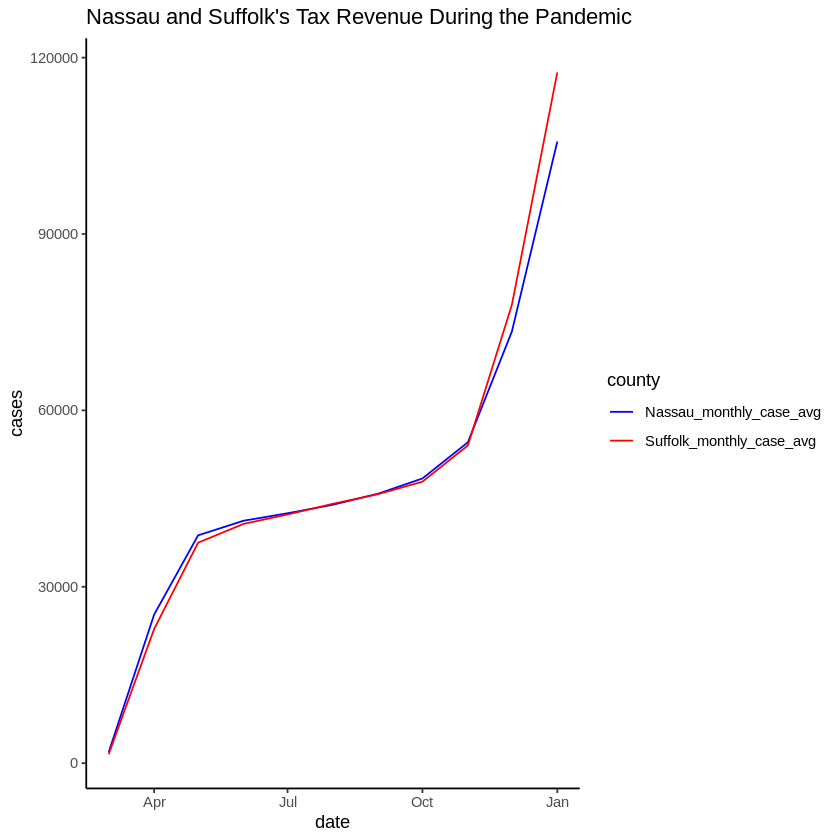

In [ ]:
Nassau_Suffolk_100_Long_Plot <-  ggplot(Nassau_SuffolkPer_100_long, aes(x=date , y= cases))+
    geom_line(aes(color = county))+
    scale_color_manual(values = c("blue" , "red"))+
    ggtitle("Nassau and Suffolk's Tax Revenue During the Pandemic")+
    theme(plot.title = element_text(size = 20, face = "bold"))+
    theme(
  legend.title = element_text(color = "black", size = 25, face = "bold" ),
  legend.text = element_text(color = "black", size = 10)
  )+

theme(plot.title = element_text(size = 20, face = "bold")) +
 theme(panel.border = element_blank(), panel.grid.major = element_blank(),
panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))+
theme_classic()

Nassau_Suffolk_100_Long_Plot

# Tax Reciepts

In [ ]:
tax_data<- read.csv("/content/copy_of_tax.csv")
head(tax_data)

,County,Albany,Allegany,Broome,Cattaraugus,Cayuga,Chautauqua,Chemung,Chenango,Clinton,⋯,Sullivan,Tioga,Tompkins,Ulster,Warren,Washington,Wayne,Westchester,Wyoming,Yates
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2019-01-01,22833878,1633328,10746778,3075774,2861114,5034491,5192584,1676485,4213155,⋯,3008236,1729324,4208823,9124751,3878592,1656146,3258320,46716381,1181220,726313
2,2019-02-01,19380356,1379212,9329733,2597608,2443956,4332760,4377675,1508803,3675242,⋯,2507877,1507870,3481988,7301917,3272174,1437462,2771513,39730167,1051093,626249
3,2019-03-01,23640839,1992001,12057691,3522855,3168310,5587309,5252717,2320586,4924878,⋯,2876454,2354071,4921083,11555864,3695072,1713495,4442309,49853360,1668308,1242426
4,2019-04-01,15561636,1144792,7812707,2187099,2096617,3767402,3364496,1341047,3358626,⋯,2456387,1283299,3079672,6311720,2832417,1148067,2558525,38098466,927153,652795
5,2019-05-01,21915579,1634361,11979729,3053002,2865008,5176247,4807042,1915799,4521657,⋯,3682869,1969784,4200870,9055771,3967539,1661728,3502737,42050104,1337791,865876
6,2019-06-01,28242164,2234495,15323676,4040949,3581552,7584892,6041333,2453182,5842770,⋯,4579063,2536870,6365558,13510178,5538311,2268870,5054673,56030419,2074497,1722526


In [ ]:
str(tax_data)

In [ ]:
tax_data <-rename(tax_data, date = County)

In [ ]:
tax_data$date <- as.Date(tax_data$date)

In [ ]:
str(tax_data)

Lets filter out Nassau and Suffolk counties and plot their sales tax revenues

In [ ]:
Nassau_Suffolk_Tax_Data <- tax_data %>% select(date , Nassau, Suffolk)
head(Nassau_Suffolk_Tax_Data)

,date,Nassau,Suffolk
,<date>,<int>,<int>
1,2019-01-01,100610156,113845190
2,2019-02-01,84682135,96199377
3,2019-03-01,105732034,130198591
4,2019-04-01,67275447,81622919
5,2019-05-01,91007794,109719584
6,2019-06-01,124487621,157546339


## Graphing

Pivot Longer :  to graph we need to make the data long

In [ ]:
Nassau_Suffolk_Tax_Data_long <- 
      Nassau_Suffolk_Tax_Data %>%
      pivot_longer(cols = c("Nassau" , "Suffolk") ,
      names_to = "county" ,
      values_to = "cases")
head(Nassau_Suffolk_Tax_Data_long)

date,county,cases
<date>,<chr>,<int>
2019-01-01,Nassau,100610156
2019-01-01,Suffolk,113845190
2019-02-01,Nassau,84682135
2019-02-01,Suffolk,96199377
2019-03-01,Nassau,105732034
2019-03-01,Suffolk,130198591


In [ ]:
head(Nassau_Suffolk_Tax_Data_long )

date,county,cases
<date>,<chr>,<int>
2019-01-01,Nassau,100610156
2019-01-01,Suffolk,113845190
2019-02-01,Nassau,84682135
2019-02-01,Suffolk,96199377
2019-03-01,Nassau,105732034
2019-03-01,Suffolk,130198591


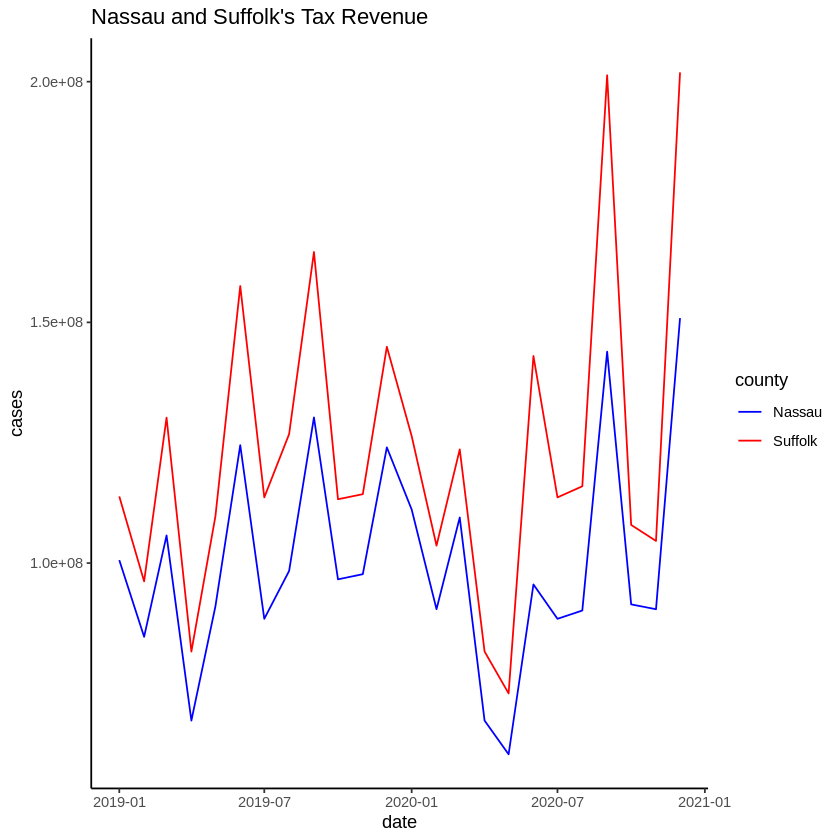

In [ ]:
Nassau_Suffolk_Tax_Rev <- ggplot(Nassau_Suffolk_Tax_Data_long, aes(x=date , y= cases))+
    geom_line(aes(color = county))+
    scale_color_manual(values = c("blue" , "red"))+
    ggtitle("Nassau and Suffolk's Tax Revenue ")+
    theme(plot.title = element_text(size = 20, face = "bold"))+
    theme(
  legend.title = element_text(color = "black", size = 25, face = "bold" ),
  legend.text = element_text(color = "black", size = 10)
  )+

theme(plot.title = element_text(size = 20, face = "bold")) +
 theme(panel.border = element_blank(), panel.grid.major = element_blank(),
panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))+
theme_classic()

Nassau_Suffolk_Tax_Rev 

Plot tax revenue as barplot

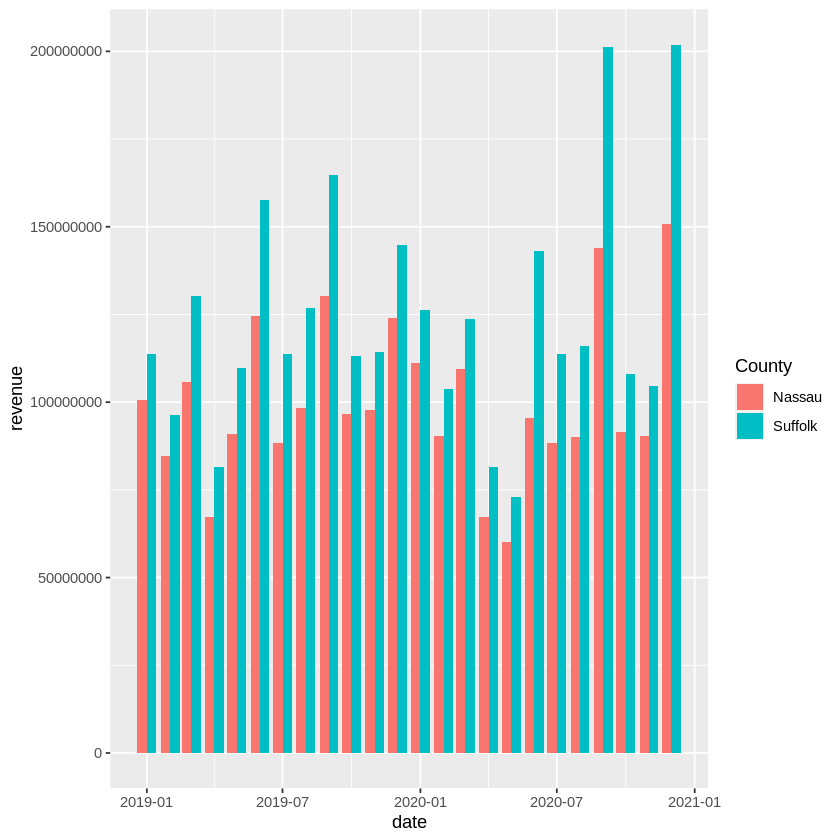

In [ ]:
Tax_bar_plot<-ggplot(Nassau_Suffolk_Tax_Data_long , aes( x= date,y= cases, fill = factor(county)))+
     geom_bar(stat="identity",position="dodge")+
     scale_fill_discrete(name="County",
                      labels=c("Nassau", "Suffolk"))+
  xlab("date")+
  ylab("revenue")
  Tax_bar_plot

## Now Combine the plots

First step combine the tax and covid data.

It may be necessary to sepaerate out Nassau and Suffolk for covid and tax.

Combo charts cannot have more than 2 variables, ie., Nassau covid and Nassau Tax
and a seperate Suffol covid and Sufflk tax.

## Nassau Data

In [ ]:
# Nassau Covid Data

# WEa have the Nassau covid data already
head(Nassau_monthly_avg_cases,3)

,date,county,Nassau_monthly_case_avg
,<date>,<chr>,<dbl>
1,2020-03-01,Nassau,1854.704
2,2020-04-01,Nassau,25270.967
3,2020-05-01,Nassau,38749.710


In [ ]:

head(Nassau_Suffolk_Tax_Data_long , 3)

date,county,cases
<date>,<chr>,<int>
2019-01-01,Nassau,100610156
2019-01-01,Suffolk,113845190
2019-02-01,Nassau,84682135


In [ ]:
# We need to t filter out the Nassau

Nassau_Tax_Data<- 
                filter(Nassau_Suffolk_Tax_Data_long, county =="Nassau")
head(Nassau_Tax_Data)

date,county,cases
<date>,<chr>,<int>
2019-01-01,Nassau,100610156
2019-02-01,Nassau,84682135
2019-03-01,Nassau,105732034
2019-04-01,Nassau,67275447
2019-05-01,Nassau,91007794
2019-06-01,Nassau,124487621


In [ ]:
Nassau_Tax_Data <- rename(Nassau_Tax_Data,revenue = cases)

In [ ]:
head(Nassau_Tax_Data ,3)

date,county,revenue
<date>,<chr>,<int>
2019-01-01,Nassau,100610156
2019-02-01,Nassau,84682135
2019-03-01,Nassau,105732034


In [ ]:
'''
Nassau_Suffolk_Avg_Monthly_Per_100k_inner <- inner_join(Nassau_monthly_avg_cases , Suffolk_monthly_avg_cases ,by ="date")
Nassau_Suffolk_Avg_Monthly_Per_100k_inner

'''

In [ ]:
Nassau_Suffolk_Comb_Covid_Revenue <-
      inner_join(Nassau_monthly_avg_cases,Nassau_Tax_Data, by = "date" )

In [ ]:
head(Nassau_Suffolk_Comb_Covid_Revenue)

,date,county.x,Nassau_monthly_case_avg,county.y,revenue
,<date>,<chr>,<dbl>,<chr>,<int>
1,2020-03-01,Nassau,1854.704,Nassau,109471704
2,2020-04-01,Nassau,25270.967,Nassau,67275447
3,2020-05-01,Nassau,38749.710,Nassau,60270267
4,2020-06-01,Nassau,41233.333,Nassau,95555602
5,2020-07-01,Nassau,42507.677,Nassau,88419892
6,2020-08-01,Nassau,43951.290,Nassau,90143233


## Let us make this table longer

First sellect the cols we are intersted in

In [ ]:
Nassau_Suffolk_Comb_Covid_Revenue_select <- 
    Nassau_Suffolk_Comb_Covid_Revenue %>%
    select(date , Nassau_monthly_case_avg ,revenue )

In [ ]:
head(Nassau_Suffolk_Comb_Covid_Revenue_select ,3)

,date,Nassau_monthly_case_avg,revenue
,<date>,<dbl>,<int>
1,2020-03-01,1854.704,109471704
2,2020-04-01,25270.967,67275447
3,2020-05-01,38749.710,60270267


Lets remove the decimals

In [ ]:
Nassau_Suffolk_Comb_Covid_Revenue_select$Nassau_monthly_case_avg <-
       as.integer(Nassau_Suffolk_Comb_Covid_Revenue_select$Nassau_monthly_case_avg )

In [ ]:
head(Nassau_Suffolk_Comb_Covid_Revenue_select ,3)

,date,Nassau_monthly_case_avg,revenue
,<date>,<int>,<int>
1,2020-03-01,1854,109471704
2,2020-04-01,25270,67275447
3,2020-05-01,38749,60270267


In [ ]:
coeff <- 0.0005

In [ ]:
# A few constants
Nassau_monthly_avg_cases <- "#69b3a2"
revenue <- rgb(0.2, 0.6, 0.9, 1)

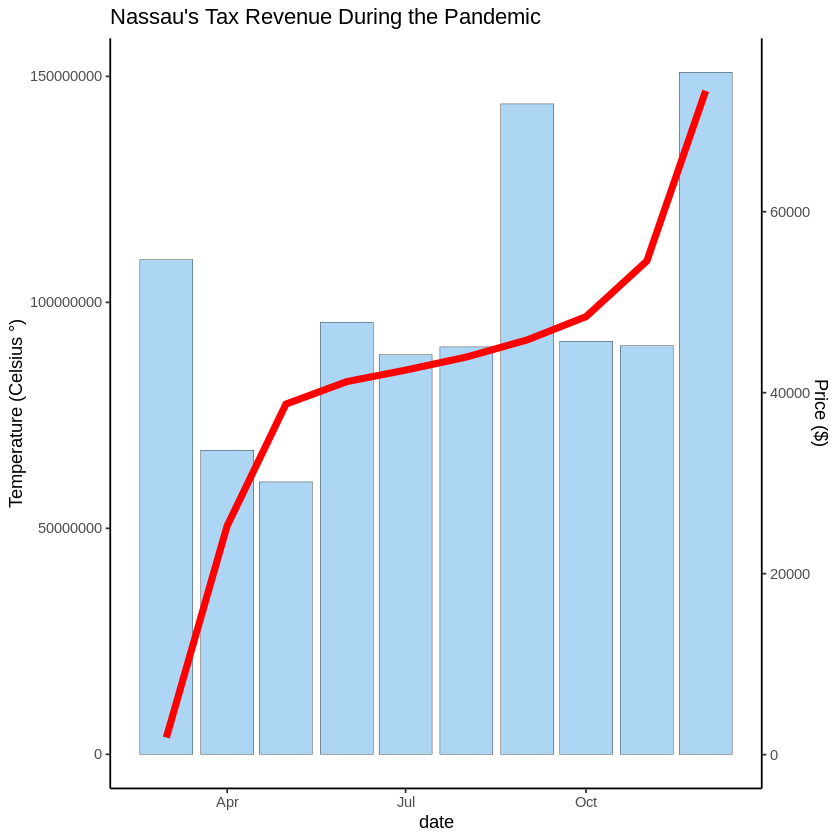

In [ ]:
ggplot( Nassau_Suffolk_Comb_Covid_Revenue_select, aes(x=date)) +
  
  geom_bar( aes(y= revenue), stat="identity", size=.1, fill= revenue, color="black", alpha=.4) + 
  geom_line( aes(y= Nassau_monthly_case_avg / coeff), size=2, color= "red") +
  scale_y_continuous(
    
    # Features of the first axis
    name = "Temperature (Celsius °)",
    
    # Add a second axis and specify its features
    sec.axis = sec_axis(~.*coeff, name="Price ($)")
  )+
    ggtitle("Nassau's Tax Revenue During the Pandemic")+
    theme(plot.title = element_text(size = 20, face = "bold"))+
    theme(
  legend.title = element_text(color = "black", size = 25, face = "bold" ),
  legend.text = element_text(color = "black", size = 10)
  )+

theme(plot.title = element_text(size = 20, face = "bold")) +
 theme(panel.border = element_blank(), panel.grid.major = element_blank(),
panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))+
theme_classic()


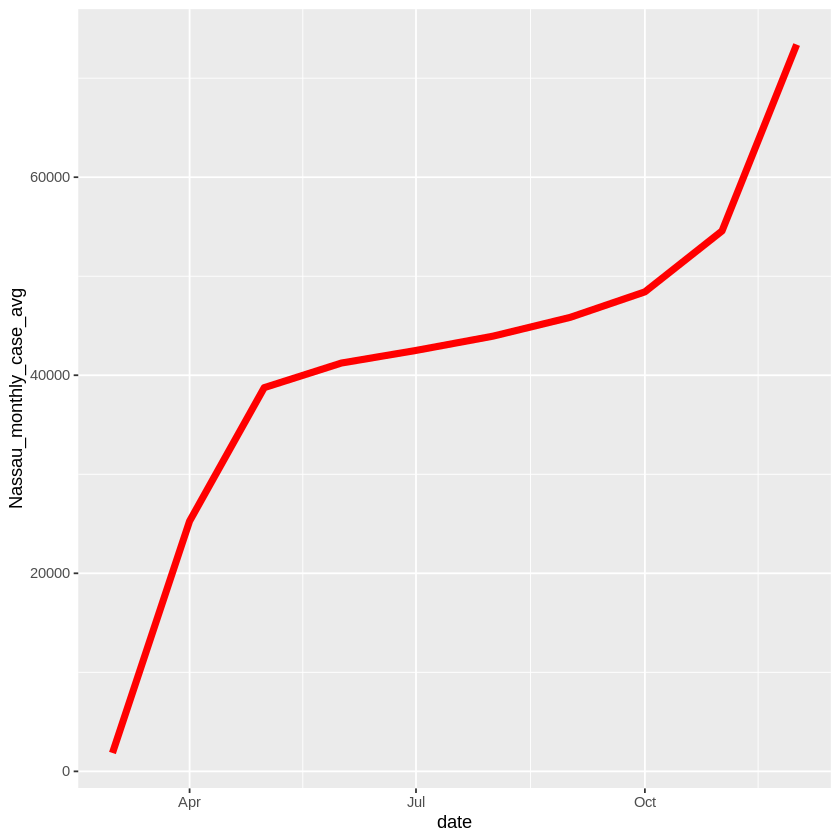

In [ ]:
ggplot( Nassau_Suffolk_Comb_Covid_Revenue_select, aes(x=date)) +
  geom_line( aes(y= Nassau_monthly_case_avg ), size=2, color= "red")